# Movie Data Analysis - Learn Python for Data Science Portfolio Project

In this project I will be analyzing a dataset with information on several movies. The project will be organized in the following fashion:

1. **Data Analysis**<br>
    Importing, cleaning, and inspecting the dataset
2. **Descriptive Statistics**<br>
    Various statistics about the columns and their values
3. **Value Summaries**<br>
    Summaries and correlations bewteen some values
4. **Profitability Analysis**<br>
    Inspecting movie profitability with more detail
5. **Star Power**<br>
    Inspecting stars, writers, directors, and correlations
6. **Conclusion**<br>
    What key insights and takeaways I have gathered from this analysis

### 1. Data analysis

Importing the libraries and then the data from the file to a dataframe:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

movie_data = pd.read_csv('movies_updated.csv')

Previewing the first 5 rows to make sure our data looks good

In [2]:
movie_data.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

         gross             company runtime,,  
0   46998772.0        Warner Bros.    146.0,  
1   58853106.0   Columbia Pictures    104.0,  
2  538375067.0           Lucasfilm    124.0,  
3   83453539.0  Paramount Pictures     88.0,  
4   39846344.0      Orion Pictures     98.0,

Checking number of rows and columns and looking for missing values:

In [3]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       4000 non-null   object 
 1   rating     3960 non-null   object 
 2   genre      4000 non-null   object 
 3   year       4000 non-null   int64  
 4   released   4000 non-null   object 
 5   score      4000 non-null   float64
 6   votes      4000 non-null   int64  
 7   director   4000 non-null   object 
 8   writer     3999 non-null   object 
 9   star       3999 non-null   object 
 10  country    4000 non-null   object 
 11  budget     4000 non-null   int64  
 12  gross      3831 non-null   float64
 13  company    3990 non-null   object 
 14  runtime,,  4000 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 468.9+ KB


The dataset has 15 columns and 4000 rows of data and has some missing values in some columns, but not enough nor in relevant enough columns that warrants concern, so I'll leave the missing data as is.

The columns all have the type of values that they should have, except for runtime, which should be `int` and is showing as `object`. Upon inspection, this is due to the fact that all values in this column have an extra comma, and even the title of the column has two extra commas.
Let's fix that:

In [4]:
# Remove the comma from the `runtime` column
movie_data['runtime,,'] = movie_data['runtime,,'].str.replace(',', '')

# Renaming the `runtime` column
movie_data = movie_data.rename(columns={"runtime,,": "runtime"})

# Converting the `runtime` column to `int` type
movie_data['runtime'] = pd.to_numeric(movie_data['runtime'], downcast = 'integer')
    
# Printing a sample to confirm
movie_data.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

         gross             company  runtime  
0   46998772.0        Warner Bros.      146  
1   58853106.0   Columbia Pictures      104  
2  538375067.0           Lucasfilm      124  
3   83453539.0  Paramount Pictures       88  
4   39846344.0      Orion Pictures       98

The data seems to be cleaner now, but it's possible to see that the `released` column has both the date of release and the country of release, so I'm going to separate that column into two, and to not generate confusion with the `country` column, where the movie was filmed, I'm renaming that column `filming_country`.

In [5]:
# Splitting the `released` column into two
movie_data["release date"] = movie_data["released"].str.extract(r'^(.*?)\s*\(')
movie_data["release country"] = movie_data["released"].str.extract(r'\((.*?)\)')

# Convert release_date to datetime type
movie_data["release date"] = pd.to_datetime(movie_data["release date"], errors="coerce")

# Drop the old column
movie_data = movie_data.drop(columns=["released"])

# Renaming the `country` column
movie_data = movie_data.rename(columns={"country": "filming country"})

# Previewing the data again
movie_data.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

   score    votes         director                   writer            star  \
0    8.4   927000  Stanley Kubrick             Stephen King  Jack Nicholson   
1    5.8    65000   Randal Kleiser  Henry De Vere Stacpoole  Brooke Shields   
2    8.7  1200000   Irvin Kershner           Leigh Brackett     Mark Hamill   
3    7.7   221000     Jim Abrahams             Jim Abrahams     Robert Hays   
4    7.3   108000     Harold Ramis       Brian Doyle-Murray     Chevy Chase   

  filming country    budget        gross             company  runtime  \
0  United Kingdom  19000000   46998772.0        Warner Bros.      146   
1   United States   4500000   58853106.0   Columbia Pictures      104   
2   United States  18000000  538375067.0           Lucasfilm      124   
3   United States   3500000   83453539.0  Paramount Pictures       88   
4   United States   6000000   39846344.0      Orion Pictures       98   

  release date release country  
0   1980-06-13   United States  
1   1980-07-02   United States  
2   1980-06-20   United States  
3   1980-07-02   United States  
4   1980-07-25   United States

### 2. Descriptive Statistics

Now that the data has been cleaned, we can start addressing some statistics.

In [6]:
print('Earliest year in our dataset:',movie_data.year.min())
print('Most recent year in our dataset:',movie_data.year.max())

Earliest year in our dataset: 1980
Most recent year in our dataset: 2001


Because using describe on the columns `votes`, `budget`, and `gross` would give results in scientific notation due to the large numbers,
I'm using separate methods instead so the results are more noticeable:

In [7]:
# From the column `votes`, checking the average number of votes and which movies had the least and the most votes
print(f'\nAverage number of votes: {movie_data.votes.mean()}\n')
temp_var = movie_data.votes.min() # Tempp var that is used only to store values in this section
print(f'The movie(s) with the least amount of votes ({temp_var} votes):\n{movie_data[movie_data.votes == temp_var].name}\n')
temp_var = movie_data.votes.max()
print(f'The movie(s) with the most amount of votes ({temp_var} votes):\n{movie_data[movie_data.votes == temp_var].name}\n')

# From the column `budget`, check the minimum, maximum, and mean values
print(f'\nAverage budget: ${round(movie_data.budget.mean(), 2)}\n')
print(f'The standard deviation for budgets in movies is ${round(np.std(movie_data.budget), 2)}.\n')
print(f'Number of movies with budget given as \'0\':{movie_data[movie_data.budget == 0].shape[0]}\n')

temp_var = min(i for i in movie_data.budget if i > 0)
print(f'The movie(s) with the smallest budget (non-zero):\n{movie_data[movie_data.budget ==temp_var].name}\nwith a budget of ${temp_var}.\n')
temp_var = movie_data.budget.max()
print(f'The movie(s) with the biggest budget:\n{movie_data[movie_data.budget == temp_var].name}\nwith a budget of ${temp_var}.\n')

# From the column `gross`, check the minimum, maximum, and mean values
print(f'\nAverage gross revenue: ${round(movie_data.gross.mean(), 2)}\n')
print(f'The standard deviation for gross revenue in movies is ${round(np.std(movie_data.gross), 2)}.\n')

temp_var = movie_data.gross.min()
print(f'The movie(s) with the smallest gross revenue:\n{movie_data[movie_data.gross ==temp_var].name}\nwith a revenue of ${temp_var}.\n')
temp_var = movie_data.gross.max()
print(f'The movie(s) with the biggest gross revenue:\n{movie_data[movie_data.gross == temp_var].name}\nwith a revenue of ${temp_var}.\n')

print('The 5 movies with the highest score are:\n')
movie_data.sort_values('score', ascending = False).head(5)


Average number of votes: 54494.5025

The movie(s) with the least amount of votes (51 votes):
472        Forever Young
841    Death of an Angel
Name: name, dtype: object

The movie(s) with the most amount of votes (2400000 votes):
2443    The Shawshank Redemption
Name: name, dtype: object


Average budget: $15427403.12

The standard deviation for budgets in movies is $22483581.91.

Number of movies with budget given as '0':1392

The movie(s) with the smallest budget (non-zero):
471    A Polish Vampire in Burbank
Name: name, dtype: object
with a budget of $3000.

The movie(s) with the biggest budget:
3045    Titanic
Name: name, dtype: object
with a budget of $200000000.


Average gross revenue: $41722023.0

The standard deviation for gross revenue in movies is $92582957.11.

The movie(s) with the smallest gross revenue:
3203    Trojan War
Name: name, dtype: object
with a revenue of $309.0.

The movie(s) with the biggest gross revenue:
3045    Titanic
Name: name, dtype: object
with a rev

name rating      genre  year  score    votes  \
2443  The Shawshank Redemption      R      Drama  1994    9.3  2400000   
2444              Pulp Fiction      R      Crime  1994    8.9  1900000   
2247          Schindler's List      R  Biography  1993    8.9  1200000   
3444                Fight Club      R      Drama  1999    8.8  1900000   
2445              Forrest Gump  PG-13      Drama  1994    8.8  1900000   

               director             writer           star filming country  \
2443     Frank Darabont       Stephen King    Tim Robbins   United States   
2444  Quentin Tarantino  Quentin Tarantino  John Travolta   United States   
2247   Steven Spielberg    Thomas Keneally    Liam Neeson   United States   
3444      David Fincher    Chuck Palahniuk      Brad Pitt         Germany   
2445    Robert Zemeckis      Winston Groom      Tom Hanks   United States   

        budget        gross                    company  runtime release date  \
2443  25000000   28817291.0  Castle Rock Entertainment      142   1994-10-14   
2444   8000000  213928762.0                    Miramax      154   1994-10-14   
2247  22000000  322161245.0         Universal Pictures      195   1994-02-04   
3444  63000000  101209702.0          Fox 2000 Pictures      139   1999-10-15   
2445  55000000  678226133.0         Paramount Pictures      142   1994-07-06   

     release country  
2443   United States  
2444   United States  
2247   United States  
3444   United States  
2445   United States

As there is a big jump from the minimum gross value to the mean and again to the maximum gross value, let's check out the percentiles:

First quartile of the gross revenue: 2835743.0
Median of the gross revenue: 11838218.0
Third quartile of the gross revenue: 35604951.5


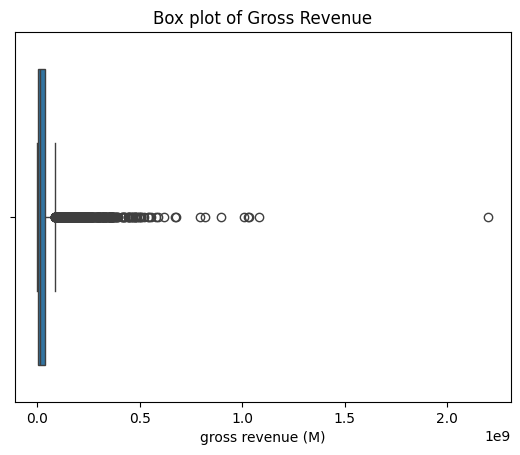

In [8]:
print(f'First quartile of the gross revenue: {movie_data.gross.quantile(0.25)}')
print(f'Median of the gross revenue: {movie_data.gross.quantile(0.5)}')
print(f'Third quartile of the gross revenue: {movie_data.gross.quantile(0.75)}')

plt.title('Box plot of Gross Revenue')
sns.boxplot(data = movie_data, x = 'gross')
plt.xlabel('gross revenue (M)')
plt.show()

As seen above, the gross revenue goes from \\$309 to \\$2835743 in the first quartile, then to \\$11838218, quadrupling its value for the second quartile, then tripling its value to \\$35604951.5 in the third quartile, and then to a maximum of \\$2201647264, almost 62 times the gross revenue in the third quartile!

This is due to some outliers, especially the one over 2M dollars, so let's have a look at which are the top-grossing movies in our dataset:

In [9]:
movie_data.sort_values('gross', ascending = False).head(5)

name rating      genre  year  \
3045                                    Titanic  PG-13      Drama  1997   
2448                              The Lion King      G  Animation  1994   
2245                              Jurassic Park  PG-13     Action  1993   
3451  Star Wars: Episode I - The Phantom Menace     PG     Action  1999   
3843      Harry Potter and the Sorcerer's Stone     PG  Adventure  2001   

      score    votes          director            writer               star  \
3045    7.8  1100000     James Cameron     James Cameron  Leonardo DiCaprio   
2448    8.5   970000      Roger Allers      Irene Mecchi  Matthew Broderick   
2245    8.1   894000  Steven Spielberg  Michael Crichton          Sam Neill   
3451    6.5   748000      George Lucas      George Lucas      Ewan McGregor   
3843    7.6   685000    Chris Columbus      J.K. Rowling   Daniel Radcliffe   

     filming country     budget         gross                company  runtime  \
3045   United States  200000000  2.201647e+09  Twentieth Century Fox      194   
2448   United States   45000000  1.083721e+09   Walt Disney Pictures       88   
2245   United States   63000000  1.033928e+09     Universal Pictures      127   
3451   United States  115000000  1.027083e+09              Lucasfilm      136   
3843  United Kingdom  125000000  1.006968e+09           Warner Bros.      152   

     release date release country  
3045   1997-12-19   United States  
2448   1994-06-24   United States  
2245   1993-06-11   United States  
3451   1999-05-19   United States  
3843   2001-11-16   United States

The big discrepancy in the `gross` column is due to the movie "Titanic", which is an outlier with a value very distant from the other values in this column. And while the median and all the quartiles stay in proximity to each other, as can be seen in the box plot above, the presence of so many outliers, especially the "Titanic" movie, skews the data.

Let's now have a look at `runtime`. As this column has smaller numbers, we can get the summary statistics using the `describe()` method:

count    4000.000000
mean      105.711750
std        18.470556
min        55.000000
25%        94.000000
50%       102.000000
75%       114.000000
max       357.000000
Name: runtime, dtype: float64


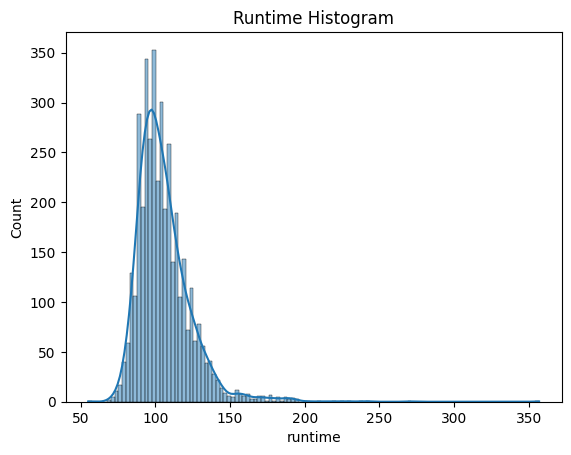

In [10]:
print(movie_data.runtime.describe())

plt.title('Runtime Histogram')
sns.histplot(data = movie_data, x = 'runtime', kde = True)
plt.show()

The shortest film has a runtime of only 55 minutes, while the longest has a runtime of almost 6 hours! Most movies have a length of about 1 hour and 45 minutes, and the graph follows the pattern of a right-skewed uniform distribution.
The movies with the shortest and the longest runtimes are:

In [11]:
print('Shortest runtime:', movie_data[movie_data.runtime == 55].name, '\n')
print('Longest runtime:', movie_data[movie_data.runtime == 357].name)

Shortest runtime: 474    The Business of Show Business
Name: name, dtype: object 

Longest runtime: 1218    Little Dorrit
Name: name, dtype: object


In [12]:
print('Dates with most released movies:')
print(movie_data['release date'].mode())
print(f'Those dates had a total of {movie_data[movie_data['release date'] == '1991-10-04'].shape[0]} movies released each.')


Dates with most released movies:
0   1986-02-14
1   1991-10-04
Name: release date, dtype: datetime64[ns]
Those dates had a total of 9 movies released each.


Looking at the dates above, I got curious and decided to investigate if, across the years, there's a peculiar day/month date that has more releases than the rest. For that, I'm going to format the `release date` column to take out the year (as the year is already present in the `year` column), create a new column with only the release month, and rerun the code above.

I will also investigate, across the years, which is the month that has the most released movies.

Dates with the most released movies:
12-25
That date had a total of 49 movies released.


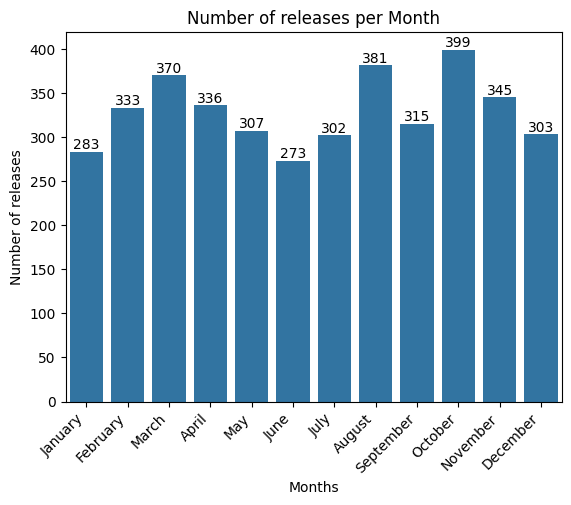

In [13]:
movie_data['release month'] = movie_data['release date'].dt.month_name()
movie_data['release date'] = movie_data['release date'].dt.strftime('%m-%d')

print('Dates with the most released movies:')
best_release_date = movie_data['release date'].mode().iloc[0] # As mode returns a series, using iloc makes it only returning the first value
print(best_release_date)
print(f'That date had a total of {movie_data[movie_data['release date'] == best_release_date].shape[0]} movies released.')

# Plotting the graph of releases per month across all years
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.title('Number of releases per Month')
ax = sns.countplot(data = movie_data, x = "release month",  order = month_order)
plt.ylabel('Number of releases')
plt.xlabel('Months')
plt.xticks(rotation = 45, ha = 'right')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Across all the years in our dataset, the single day with the most releases is Christmas Day, 25/12, with 49 movies released on that day, but looking at the months, the month with the most releases is October, probably due to Halloween, followed by August and then by March.


Now that we've analyzed the numerical columns, let's have a look at some categorical columns:

In [14]:
print(movie_data.genre.describe(),'\n')
print(movie_data.company.describe(),'\n')
print(movie_data.director.describe(),'\n')
print(movie_data.star.describe(),'\n')
print(movie_data.writer.describe(),'\n')
print(movie_data.rating.describe())

count       4000
unique        17
top       Comedy
freq        1355
Name: genre, dtype: object 

count                   3990
unique                  1305
top       Universal Pictures
freq                     191
Name: company, dtype: object 

count            4000
unique           1678
top       Woody Allen
freq               22
Name: director, dtype: object 

count               3999
unique              1655
top       Robert De Niro
freq                  27
Name: star, dtype: object 

count             3999
unique            2685
top       Stephen King
freq                27
Name: writer, dtype: object 

count     3960
unique      11
top          R
freq      2043
Name: rating, dtype: object


Here, we can see that the most common movie genre is 'comedy' with 1355 occurrences, with over a quarter of the movies in our dataset. The most common rating is also 'R' - 'Restricted' with over half the movies obtaining that rating.

### 3. Value Summaries

Let's now get some more details in some values. I'll start by analyzing how many counts of each rating there are:

In [15]:
movie_data.rating.value_counts()      

rating
R            2043
PG-13         848
PG            815
G             106
Not Rated      92
Unrated        32
NC-17          14
TV-MA           4
X               3
TV-PG           2
Approved        1
Name: count, dtype: int64

We can see that there are two values for unrated movies: "Unrated" and "Not Rated". We can, for the sake of simplicity, replace the values stating "Not Rated" with "Unrated", and we can also find out which film has the "Approved" rating and replace it with the appropriate rating with a Google search.

In [16]:
movie_data = movie_data.replace({'rating': 'Not Rated'}, 'Unrated')

print(movie_data[movie_data.rating == "Approved"].name)

120    Tarzan the Ape Man
Name: name, dtype: object


After a Google search, I reached the conclusion that Tarzan the Ape Man (1981) has an "R" rating, so I'm replacing it. Then, I'll print the value_counts again so I can make sure our changes had an effect.

In [17]:
movie_data = movie_data.replace({'rating': 'Approved'}, 'R')
movie_data.rating.value_counts()

rating
R          2044
PG-13       848
PG          815
Unrated     124
G           106
NC-17        14
TV-MA         4
X             3
TV-PG         2
Name: count, dtype: int64

Now that the ratings are showing appropriately, we can show on a plot their breakdown:

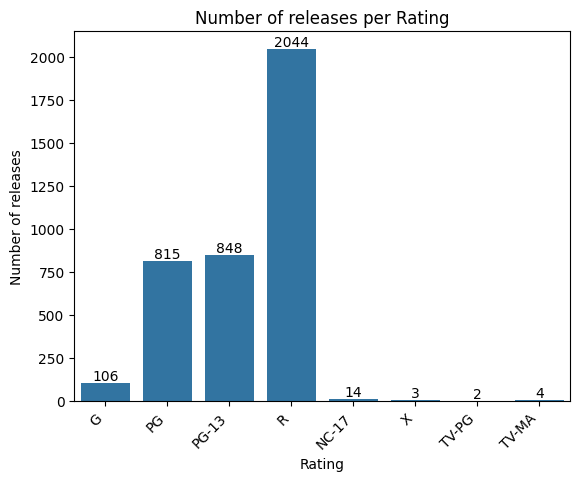

In [18]:
rating_order = ["G", "PG", "PG-13", "R", "NC-17", "X", "TV-PG", "TV-MA"]

plt.title('Number of releases per Rating')
ax =sns.countplot(data = movie_data, x = "rating",  order = rating_order)
plt.ylabel('Number of releases')
plt.xlabel('Rating')
plt.xticks(rotation = 45, ha = 'right')

for container in ax.containers:
    ax.bar_label(container)
    
plt.show()

As we've seen, 'R' rated movies are the majority, with over twice the second or third places, 'PG-13' and 'PG' which have 848 and 815 counts each, followed by a big fall for 'G' rated movies with only 106 counts.

Let's do the same for the `genre`:

genre
Comedy       1355
Drama         807
Action        775
Crime         302
Adventure     231
Biography     175
Horror        158
Animation     113
Fantasy        33
Mystery        13
Thriller       11
Family          8
Romance         8
Sci-Fi          6
Western         3
Music           1
History         1
Name: count, dtype: int64


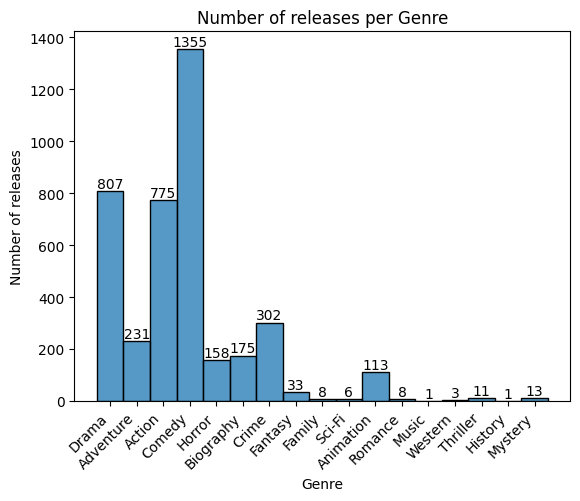

In [19]:
print(movie_data.genre.value_counts())

plt.title('Number of releases per Genre')
ax = sns.histplot(data = movie_data, x = 'genre')
plt.ylabel('Number of releases')
plt.xlabel('Genre')
plt.xticks(rotation = 45, ha = 'right')

for container in ax.containers:
    ax.bar_label(container)
    
plt.show()

Right after 'Comedy', the next two most popular genres are 'Drama' and 'Action' with around 800 counts each, followed by 'Crime' with only 302 movies released in this genre.

I'll now try to find out if the runtime of the films changed as the years went by:

    year     runtime
0   1980  107.402174
1   1981  105.955752
2   1982  105.928571
3   1983  102.270833
4   1984  104.446429
5   1985  102.235000
6   1986  101.805000
7   1987  102.710000
8   1988  103.585000
9   1989  102.710000
10  1990  104.925000
11  1991  106.315000
12  1992  106.690000
13  1993  107.525000
14  1994  105.570000
15  1995  106.725000
16  1996  107.240000
17  1997  107.260000
18  1998  107.365000
19  1999  109.390000
20  2000  107.850000
21  2001  110.777070


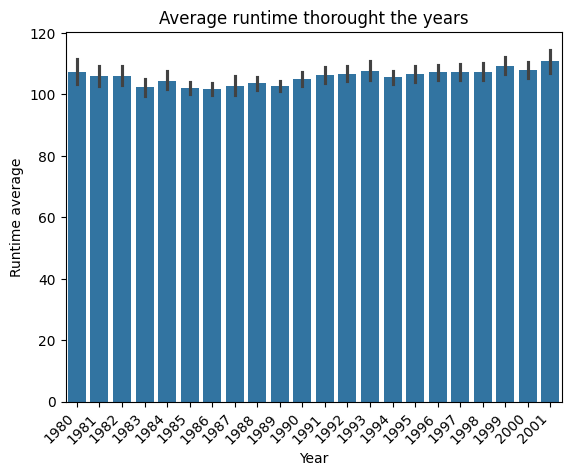

In [20]:
print(movie_data.groupby('year').agg({'runtime': 'mean'}).reset_index())

# Showing the above data on a plot
plt.title('Average runtime thorought the years')
sns.barplot(data= movie_data, x='year', y= 'runtime')
plt.ylabel('Runtime average')
plt.xlabel('Year')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

We can see that despite a little dip in the 80s, the average runtime of the movies has been very consistent, always in close proximity to 105 minutes.
Let's do the same for `score`, `budget`, and `gross`:

    year  score       budget        gross
0   1980   6.30   6183152.17  30662555.11
1   1981   6.30   6278318.58  24231393.16
2   1982   6.29   6640238.10  26786390.90
3   1983   6.02   6208163.62  21484411.14
4   1984   6.19   6644797.62  22361343.01
5   1985   6.31   6102550.00  20855984.65
6   1986   6.15   6323936.88  19610278.69
7   1987   6.22   6912713.39  21454437.53
8   1988   6.28   8652700.00  25342333.15
9   1989   6.18   8923812.89  32207676.08
10  1990   6.33  10362515.00  35624271.52
11  1991   6.39  11341240.00  31912095.24
12  1992   6.41  13241888.84  38600882.72
13  1993   6.38  13426750.00  40676562.31
14  1994   6.31  16252273.84  45772352.29
15  1995   6.46  17724168.78  47960941.54
16  1996   6.24  20722900.00  49344361.76
17  1997   6.36  26280725.00  65890833.00
18  1998   6.46  27311330.00  57608366.80
19  1999   6.50  33714700.00  69280195.49
20  2000   6.36  31701250.00  68643519.74
21  2001   6.56  36848726.11  95749104.54


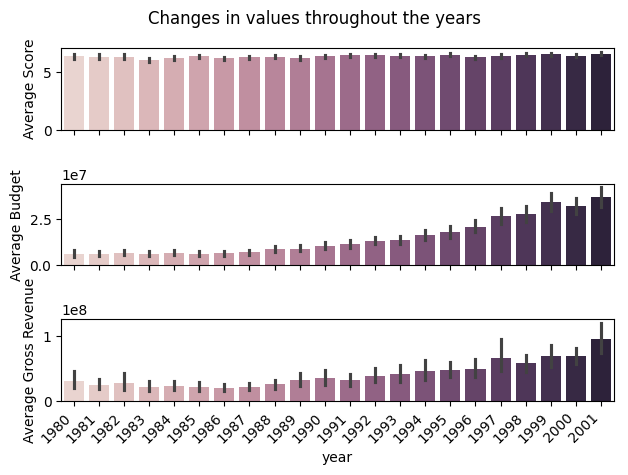

In [21]:
print(movie_data.groupby('year').agg({'score': 'mean','budget': 'mean', 'gross': 'mean'}).round(2).reset_index())

# Showing the above data on a plot
plt.suptitle('Changes in values throughout the years')
plt.subplot(3,1,1)

sns.barplot(data= movie_data, x='year', y= 'score', hue = 'year', legend = False)
plt.ylabel('Average Score')
plt.xlabel('')
plt.xticks(color = 'w')


plt.subplot(3,1,2)

sns.barplot(data= movie_data, x='year', y= 'budget', hue = 'year', legend = False)
plt.ylabel('Average Budget')
plt.xlabel('')
plt.xticks(color = 'w')

plt.subplot(3,1,3)

sns.barplot(data= movie_data, x='year', y= 'gross', hue = 'year', legend = False)
plt.ylabel('Average Gross Revenue')
plt.xticks(rotation = 45, ha = 'right')

plt.tight_layout()
plt.show()

Through these observations we can see that the average score has remained fairly consistent through the years, but the average budget for the movies has increased almost 6 times, while their gross revenue increased by only three times. This is a bit surprising, as my expectation was for the gross revenue to be directly correlated to the budget. The fact that the budget still keeps increasing but the gross revenue is not increasing as much might be because the production companies are also counting on other types of revenue to make up for the budget allocated to filming, like merchandise, books, games, DVD rentals, TV airings, etc.

Now, let's investigate the 'rating' and 'genre' columns:

    rating  score       budget        gross  runtime
0        G   6.70  21948113.21  88502424.67    89.60
1    NC-17   6.53   4132142.86   4820668.21   102.57
2       PG   6.17  14752176.40  45093268.10   103.82
3    PG-13   6.19  23811162.46  65933528.33   106.12
4        R   6.36  13169644.14  30498422.65   106.90
5    TV-MA   7.22         0.00   2273019.25   102.25
6    TV-PG   5.85         0.00   1689723.00   106.50
7  Unrated   7.05    541909.43   2241869.80   109.65
8        X   6.90   5666666.67   8485984.33   117.00


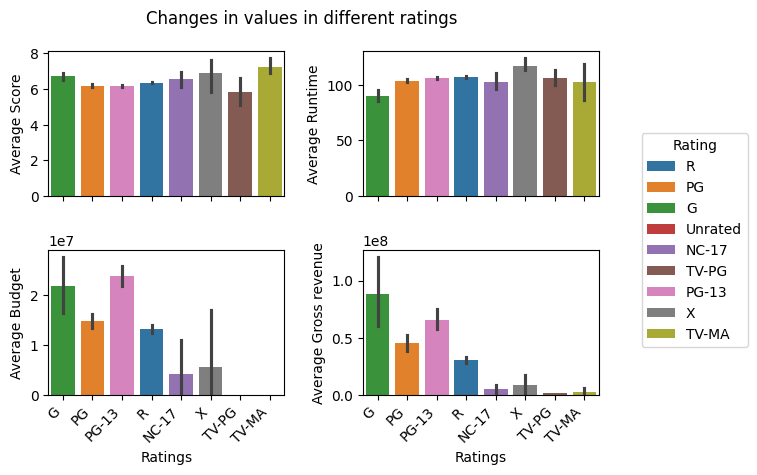

In [22]:
print(movie_data.groupby('rating').agg({'score': 'mean','budget': 'mean', 'gross': 'mean', 'runtime': 'mean'}).round(2).reset_index())

# Showing the above data on a plot
plt.suptitle('Changes in values in different ratings')

plt.subplot(2,2,1)
sns.barplot(data= movie_data, x='rating', y= 'score', order= rating_order, hue = 'rating', legend = False)
plt.ylabel('Average Score')
plt.xlabel('')
plt.xticks( color = 'w')

plt.subplot(2,2,2)
sns.barplot(data= movie_data, x='rating', y= 'runtime', order= rating_order, hue = 'rating', legend = False)
plt.ylabel('Average Runtime')
plt.xlabel('')
plt.xticks(color = 'w')


plt.subplot(2,2,3)
sns.barplot(data= movie_data, x='rating', y= 'budget', order= rating_order, hue = 'rating', legend = False)
plt.ylabel('Average Budget')
plt.xlabel('Ratings')
plt.xticks(rotation = 45, ha = 'right')

plt.subplot(2,2,4)
ax = sns.barplot(data= movie_data, x='rating', y= 'gross', order= rating_order, hue = 'rating')
plt.ylabel('Average Gross revenue')
plt.xlabel('Ratings')
plt.xticks(rotation = 45, ha = 'right')

# Grab handles/labels from this last subplot
handles, labels = ax.get_legend_handles_labels()

# Remove the local legend from the last subplot so we don't get two legends, only the global one
ax.legend_.remove()

# Create a single legend for all subplots
plt.figlegend(handles, labels, title='Rating', loc='center left', bbox_to_anchor=(1.02, 0.5))

plt.tight_layout()
plt.show()

'TV-MA' ratings have the best average score, while 'TV-PG' has the lowest, as 'Approved' is not an official rating. The most budget is invested in 'PG-13' and 'G' ratings, which are the ones that generate the highest amounts of gross revenue. As for runtime, as the rating goes higher in the hierarchy, the longer the average runtime.

Of note, TV productions have almost no budget compared to other productions, but also don't generate as much gross revenue.

        genre  score       budget         gross  runtime
0      Action   6.01  26622223.17  7.232715e+07   105.94
1   Adventure   6.15  19068658.01  4.786276e+07   106.18
2   Animation   6.88  29784955.75  1.004415e+08    86.62
3   Biography   7.05  14157312.96  3.012749e+07   122.43
4      Comedy   6.18  11095983.18  3.108453e+07   100.49
5       Crime   6.65  14407662.25  2.953531e+07   111.48
6       Drama   6.67  11349910.76  3.089225e+07   113.41
7      Family   6.55   3687500.00  1.098218e+08    97.00
8     Fantasy   6.02  16657575.76  3.583649e+07    99.09
9     History   8.30    323562.00           NaN    55.00
10     Horror   5.74   8318525.32  2.417270e+07    95.45
11      Music   7.20         0.00  1.100140e+05   117.00
12    Mystery   6.50  17915384.69  4.486892e+07   113.62
13    Romance   6.40   5625000.00  9.121108e+06   108.38
14     Sci-Fi   5.98   8416666.67  4.732608e+06   101.17
15   Thriller   5.89   3681818.18  1.045206e+07   101.09
16    Western   5.67   7000000.

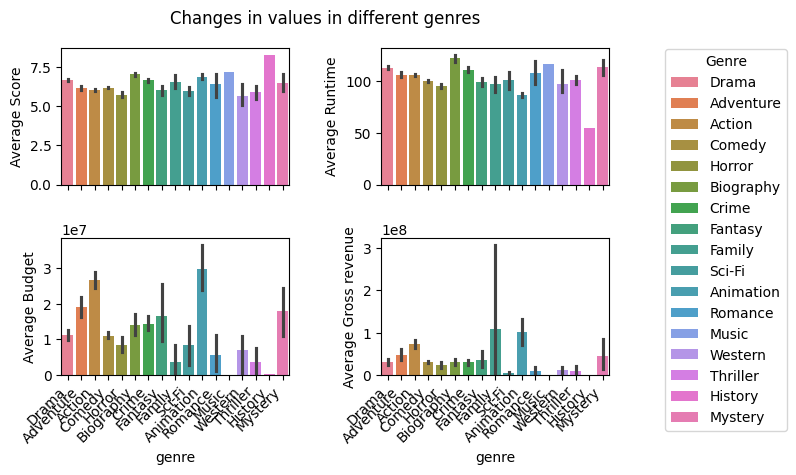

In [23]:
print(movie_data.groupby('genre').agg({'score': 'mean','budget': 'mean', 'gross': 'mean', 'runtime': 'mean'}).round(2).reset_index())


# Now doing the same for Genre
plt.suptitle('Changes in values in different genres')

plt.subplot(2,2,1)
sns.barplot(data=movie_data, x='genre', y='score', hue='genre', legend=False)
plt.ylabel('Average Score')
plt.xlabel('')
plt.xticks(color='w')

plt.subplot(2,2,2)
sns.barplot(data=movie_data, x='genre', y='runtime', hue='genre', legend = False)
plt.ylabel('Average Runtime')
plt.xlabel('')
plt.xticks(color='w')

plt.subplot(2,2,3)
sns.barplot(data=movie_data, x='genre', y='budget', hue='genre', legend=False)
plt.ylabel('Average Budget')
plt.xticks(rotation=45, ha='right')

plt.subplot(2,2,4)
ax = sns.barplot(data=movie_data, x='genre', y='gross', hue='genre', legend=True)
plt.ylabel('Average Gross revenue')
plt.xticks(rotation=45, ha='right')


# Grab handles/labels from the last subplot
handles, labels = ax.get_legend_handles_labels()

# Remove the local legend from that subplot
ax.legend_.remove()

# Add a single shared legend for the whole figure
plt.figlegend(handles, labels, title="Genre", loc="center left", bbox_to_anchor=(1.02, 0.5))   # move outside the grid, to the right

plt.tight_layout()
plt.show()

As for the genres of the films, the highest-rated genre is 'History', followed by 'Music' and then 'Biography', and the lowest scores belong to 'Western', followed by 'Horror' and 'Thriller', but these results might be due to the reduced number of movies from these 6 categories, skewing the data.
The biggest budgets are allocated to 'Action' and 'Animated' movies, which coincide with the movies that return the most gross revenue. 'Music' and 'Biography' genres have noticeably longer runtimes than the other categories, and the 'History' genre has the lowest runtime at 55 minutes.

### 4. Profitability Analysis

To better analyze the profitability of the movie industry, I'll create a new column in the dataset that contains a 'profit ratio'
$$profit\_ratio = \frac{gross\_revenue}{budget}$$

In [24]:
movie_data['profit ratio'] = (movie_data.gross/movie_data.budget).round(2)
movie_data.head(5)

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

   score    votes         director                   writer            star  \
0    8.4   927000  Stanley Kubrick             Stephen King  Jack Nicholson   
1    5.8    65000   Randal Kleiser  Henry De Vere Stacpoole  Brooke Shields   
2    8.7  1200000   Irvin Kershner           Leigh Brackett     Mark Hamill   
3    7.7   221000     Jim Abrahams             Jim Abrahams     Robert Hays   
4    7.3   108000     Harold Ramis       Brian Doyle-Murray     Chevy Chase   

  filming country    budget        gross             company  runtime  \
0  United Kingdom  19000000   46998772.0        Warner Bros.      146   
1   United States   4500000   58853106.0   Columbia Pictures      104   
2   United States  18000000  538375067.0           Lucasfilm      124   
3   United States   3500000   83453539.0  Paramount Pictures       88   
4   United States   6000000   39846344.0      Orion Pictures       98   

  release date release country release month  profit ratio  
0        06-13   United States          June          2.47  
1        07-02   United States          July         13.08  
2        06-20   United States          June         29.91  
3        07-02   United States          July         23.84  
4        07-25   United States          July          6.64

Now we can find out what genres, ratings, and companies were the most profitable:

In [25]:
print(movie_data.groupby('genre').agg({'profit ratio': 'mean'}).round(2).reset_index(), '\n')
print(movie_data.groupby('rating').agg({'profit ratio': 'mean'}).round(2).reset_index(), '\n')
print(movie_data.groupby('company').agg({'profit ratio': 'mean'}).round(2).reset_index())

        genre  profit ratio
0      Action           inf
1   Adventure           inf
2   Animation           inf
3   Biography           inf
4      Comedy           inf
5       Crime           inf
6       Drama           inf
7      Family           inf
8     Fantasy           inf
9     History           NaN
10     Horror           inf
11      Music           inf
12    Mystery           inf
13    Romance           inf
14     Sci-Fi           inf
15   Thriller           inf
16    Western           inf 

    rating  profit ratio
0        G           inf
1    NC-17           inf
2       PG           inf
3    PG-13           inf
4        R           inf
5    TV-MA           inf
6    TV-PG           inf
7  Unrated           inf
8        X           inf 

                          company  profit ratio
0                 .406 Production          0.04
1              1+2 Seisaku Iinkai           inf
2                  13 Productions           inf
3                   1492 Pictures          1.52
4 

As can be seen above, there are a lot of infinite values, implying that in our dataset we have a lot of '0' values. I'm going to see how many values of the column `budget` are '0':

In [26]:
movie_data.budget.value_counts().head()

budget
0           1392
10000000     114
15000000     113
25000000     100
20000000      93
Name: count, dtype: int64

Our data does contain a lot of values for `budget` that are zeros, so I'm going to investigate the same as above, but only for `budget` greater than '0'.<br> Also, as there are many different companies in our dataset, let's order the set so we can have a look at the top 3 companies:

In [27]:
print(movie_data.loc[movie_data['budget']>0].groupby('genre').agg({'profit ratio': 'mean'}), '\n')
print(movie_data.loc[movie_data['budget']>0].groupby('rating').agg({'profit ratio': 'mean'}).round(2).reset_index(), '\n')
print(movie_data.loc[movie_data['budget']>0].groupby('company').agg({'profit ratio': 'mean'}).round(2).sort_values('profit ratio', ascending = False).reset_index().head(3))

           profit ratio
genre                  
Action         3.185255
Adventure      2.338944
Animation      3.630000
Biography      2.248835
Comedy         3.585496
Crime          1.928065
Drama          2.744063
Family        37.815000
Fantasy        2.319355
History             NaN
Horror        40.836930
Mystery        2.430000
Romance        0.616667
Sci-Fi         1.370000
Thriller       1.533333
Western        0.995000 

    rating  profit ratio
0        G          3.59
1    NC-17          2.80
2       PG          2.98
3    PG-13          2.63
4        R          6.41
5  Unrated          3.52
6        X          1.01 

                  company  profit ratio
0             Haxan Films       4143.98
1           Redwave Films         73.70
2  View Askew Productions         59.92


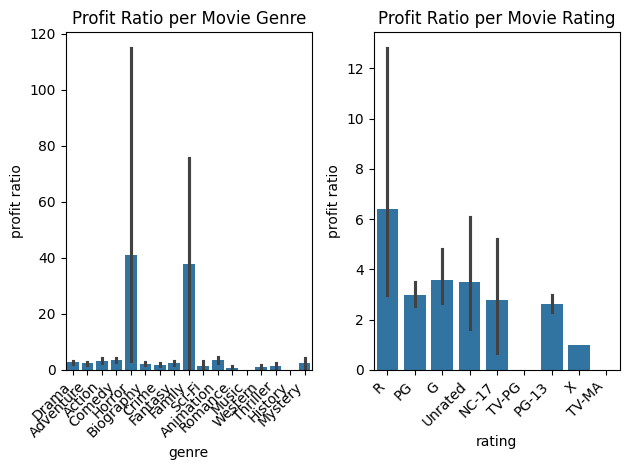

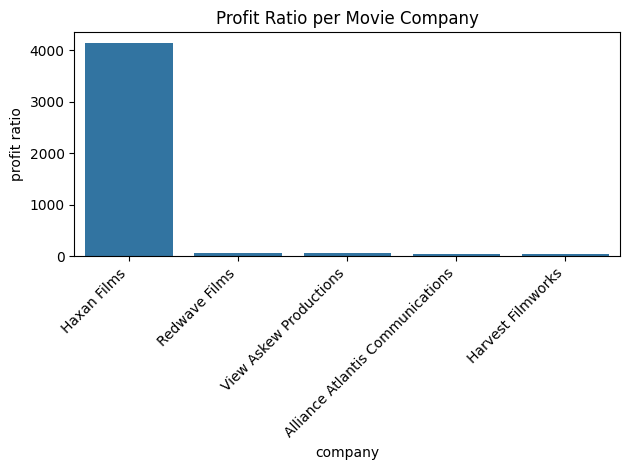

In [28]:
# Ploting the above data
plt.subplot(1,2,1)
plt.title('Profit Ratio per Movie Genre')
sns.barplot(data = movie_data, y= 'profit ratio', x= 'genre')
plt.xticks(rotation= 45, ha = 'right')

plt.subplot(1,2,2)
plt.title('Profit Ratio per Movie Rating')
sns.barplot(data = movie_data, y= 'profit ratio', x= 'rating')
plt.xticks(rotation= 45, ha = 'right')

plt.tight_layout()
plt.show()

#Creating a mini-dataset so it's possible to show the top 5 companies with best profit ratio
top_ratio_comp = (movie_data.loc[movie_data['budget']>0].groupby('company').agg({'profit ratio': 'mean'}).round(2).sort_values('profit ratio', ascending = False).reset_index().nlargest(5, 'profit ratio'))

# Plotting Profit Ratio per company
plt.title('Profit Ratio per Movie Company')
sns.barplot(data = top_ratio_comp, y= 'profit ratio', x= 'company')
plt.xticks(rotation= 45, ha = 'right')

plt.tight_layout()
plt.show()

Now, we can see that for budgets reported greater than '0', the 'Family' and 'Horror' genres have a profit ratio way above all other genres, with approximately a 40% ratio, while all other genres are within the 1 to 3.5% ratio. 'R'-rated movies tend to have a better ratio as well, at 6.41%, while 'X'-rated movies have the worst ratio at 1.01%. The company with the best ratio is Haxan Films, with a ratio of 4143.93, way above their spent budget!

I'm also interested in knowing which are the top films with the best profit ratio, so I'll plot a bar chart:

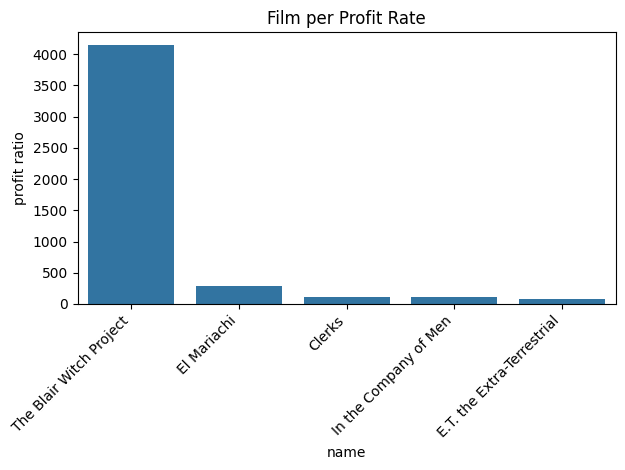

In [29]:
#Creating a mini-dataset so it's possible to show the top 5 companies with best profit ratio
top_ratio_movies = (movie_data.loc[movie_data['budget']>0].sort_values('profit ratio', ascending = False).reset_index().nlargest(5, 'profit ratio'))

# Plotting Budget per company
plt.title('Film per Profit Rate')
sns.barplot(data = top_ratio_movies, y= 'profit ratio', x= 'name')
plt.xticks(rotation= 45, ha = 'right')

plt.tight_layout()
plt.show()

In [30]:
movie_data[movie_data.name == 'The Blair Witch Project']

name rating   genre  year  score   votes  \
3459  The Blair Witch Project      R  Horror  1999    6.5  239000   

           director         writer             star filming country  budget  \
3459  Daniel Myrick  Daniel Myrick  Heather Donahue   United States   60000   

            gross      company  runtime release date release country  \
3459  248639099.0  Haxan Films       81        07-30   United States   

     release month  profit ratio  
3459          July       4143.98

From 1980 to 2001, the filme with the best profit ratio was "The Blair Witch Project", which cost \\$60K to make, with a profit of almost \\$249M!

Now, let's analyze how is the runtime correlated with the movie's score:

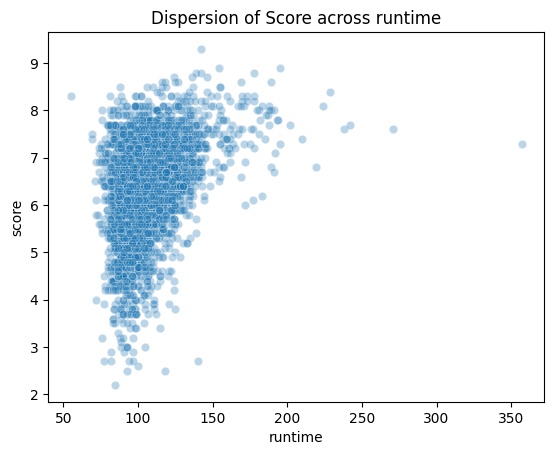

In [31]:
plt.title('Dispersion of Score across runtime')
sns.scatterplot(data= movie_data, x= 'runtime', y= 'score', alpha = 0.3)
plt.show()

The plot shows that a bigger runtime doesn't mean a better score, and higher scores are concentrated from 90 minutes to 150 minutes runtime.

Let's now see how the score, the budget, and the gross revenue are correlated:

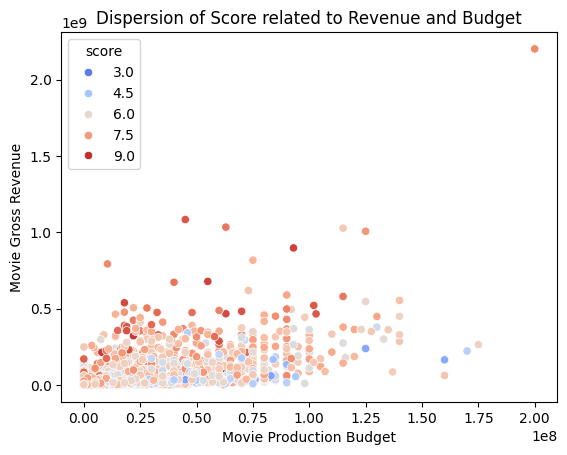

In [32]:
plt.title('Dispersion of Score related to Revenue and Budget')
palette = sns.color_palette("coolwarm", as_cmap=True)
sns.scatterplot(data= movie_data, x= 'budget', y= 'gross', hue = 'score', palette = palette)
plt.xlabel('Movie Production Budget')
plt.ylabel('Movie Gross Revenue')
plt.show()

We know, from a previous step in this analysis, that that outlier at the top right belongs to "Titanic", which had a very big budget but also performed remarkably well at the box office. On the graph, we can also see that there is no direct correlation between a movie's production budget and its gross revenue or even the score it obtains, as there are movies across different budgets that acquired good gross revenue and managed to get a good score as well.

### 5. Star Power

I'm now going to dig deeper into analysis and correlations derived from the actors, directors, and writers. Let's start by observing the directors:

In [33]:
print('The top five director/actor colaborations are:\n',
      movie_data.groupby(['director','star']).size().reset_index(name="count").sort_values("count", ascending=False).head(5), '\n')

print('The top five director/writer colaborations are:\n',
      movie_data.groupby(['director', 'writer']).size().reset_index(name="count").sort_values("count", ascending=False).head(5), '\n')

print('The top three director/company colaborations are:\n',
      movie_data.groupby(['director', 'company']).size().reset_index(name="count").sort_values("count", ascending=False).head(3), '\n')

The top five director/actor colaborations are:
              director             star  count
589    Clint Eastwood   Clint Eastwood     13
3697      Woody Allen      Woody Allen     12
1326  J. Lee Thompson  Charles Bronson      6
2840   Richard Donner       Mel Gibson      6
0        Aaron Norris     Chuck Norris      5 

The top five director/writer colaborations are:
              director           writer  count
3517      Woody Allen      Woody Allen     21
3074        Spike Lee        Spike Lee      8
305     Blake Edwards    Blake Edwards      8
1624      John Hughes      John Hughes      8
2485  Pedro Almodóvar  Pedro Almodóvar      8 

The top three director/company colaborations are:
             director                                      company  count
3532     Woody Allen  Jack Rollins & Charles H. Joffe Productions     11
571   Clint Eastwood                                 Warner Bros.      8
1334     James Ivory                   Merchant Ivory Productions      7 



Let's see who the top 10 directors with the best score are:

In [34]:
movie_data.groupby('director').agg({'score': 'mean'}).reset_index().round(1).sort_values('score', ascending = False).head(10)

director  score
1601        Tony Kaye    8.5
1378     Roger Allers    8.5
1437     Sergio Leone    8.4
1583        Tom Logan    8.3
1534  Tengiz Abuladze    8.3
1136  Moustapha Akkad    8.3
1416       Sam Mendes    8.3
595    Hayao Miyazaki    8.3
470    Frank Darabont    8.3
200         Béla Tarr    8.2

From the above information, we can see that both Clint Eastwood and Woody Allen have the most movies as both director and star, as they have 13 and 12 movies where they are the main actor. Woody Allen also wrote 21 movies in which he was also the director. Both Woody Allen and Clint Eastwood appear again in the top three for director/company collaborations with Jack Rollins & Charles H. Joffe Productions and Warner Bros., respectively.<br>
The top leading directors are more varied, with both Tony Kaye and Roger Allers in first place with a score of 8.5.


I'm now going to check which actors work most often with which companies and which genres and then see a list of the 10 best-scored actors:

In [35]:
print('The top three actor/company colaborations are:\n',
      movie_data.groupby(['star','company']).size().reset_index(name="count").sort_values("count", ascending=False).head(3), '\n')

print('The top three actor on genre works are:\n',
      movie_data.groupby(['star','genre']).size().reset_index(name="count").sort_values("count", ascending=False).head(3), '\n')

movie_data.groupby('star').agg({'score': 'mean'}).reset_index().round(1).sort_values('score', ascending = False).head(10)

The top three actor/company colaborations are:
                 star             company  count
608   Clint Eastwood        Warner Bros.      8
902     Eddie Murphy  Paramount Pictures      7
3204   Steven Seagal        Warner Bros.      7 

The top three actor on genre works are:
                        star   genre  count
2253           Steve Martin  Comedy     20
129   Arnold Schwarzenegger  Action     18
411            Chuck Norris  Action     17 



star  score
321         Daveigh Chase    8.6
1273      Philippe Noiret    8.5
411         Edward Norton    8.5
1033          Mark Hamill    8.5
1649         Yôji Matsuda    8.4
456     F. Murray Abraham    8.3
93          Audrey Tautou    8.3
80          Anthony Quinn    8.3
94    Avtandil Makharadze    8.3
585       Hossain Sabzian    8.3

Clint Eastwood appears again, leading the collaboration between a star and company, Warner Bros, with 8 movies, and the top 3 actors working in a genre are led by Steve Martin in "Comedy" with 20 movies, followed closely by Arnold Schwarzenegger and Chuck Norris in "Action" with 18 and 17.<br>
Stars with higher scores are Daveigh Chase with 8.6 and, with 8.5, actors Philippe Noiret, Edward Norton and Mark Hamill.

We can also have a quick look at which writers had the movies with higher scores:

In [36]:
movie_data.groupby('writer').agg({'score': 'mean'}).reset_index().round(1).sort_values('score', ascending = False).head(10)

writer  score
2468   Thomas Keneally    8.9
1031    J.R.R. Tolkien    8.8
422    Chuck Palahniuk    8.8
2666     Winston Groom    8.8
1504    Leigh Brackett    8.7
2580   Vincenzo Cerami    8.6
1003      Irene Mecchi    8.5
940         Harry Grey    8.4
1843  Nicholas Pileggi    8.4
1975     Peter Shaffer    8.3

From this data it's possible to see that the majority of the names that appear are novelists and writers whose works have been adapted to the big screen, including the leading 5 names.

### 6. Conclusion

I had a lot of fun and made some interesting discoveries while doing this project, and it got me curious to know, if it was a dataset with more recent entries, how would the findings change? I would definitely like to work with a larger and more recent dataset on movies one day, should the opportunity arise.

These are some findings I made during the analysis:
 - Titanic is the movie with the biggest budget and gross revenue in our dataset, having a budget of \\$200M and a gross revenue of \\$2B.
 - Of the top 5 best-scored movies from 1980 to 2001, 4 are from 1994: "The Shawshank Redemption", "Pulp Fiction", and "Schindler's List" in the first three positions and "Forrest Gump" in number 5.
 - When analyzing the gross revenue, there is a big jump from the third quartile to the maximum values, with the maximum being almost 62 times the value of the third quartile. This is due to movies that managed to have gross revenue several times their budget, like "Titanic", "The Lion King" or "Jurassic Park".
 - The dates with the most simultaneous releases were 14/02/86, Valentine's Day, and 04/10/1991, both with 9 movies released that day, but the best day over all the years to release movies is Christmas Day, with 49 movies released on Christmas, possibly due to people having Christmas breaks and holidays.
 - The most frequent genre is Comedy, with 1355 entries, followed by Drama with 807 and Action with 775. The company with the most releases is Universal Pictures with 191 movies, and "R"-rated movies are more frequent with 2043 entries, over half of our dataset!
 - Over the years, the average runtimes and scores have remained fairly consistent.
 - The movie's production budget has increased almost 6 times, while the gross revenue has only increased approximately 3 times, which I found interesting, as I was expecting the gross revenue to have increased more or the same as the budget. This might be because the production companies might be relying more on other sources of revenue like toys, TV airings, memorabilia, etc.
 - Both the biggest budget and gross revenue are for "PG-13" and "PG" ratings, which makes sense, as everyone of every age can see them, and this makes a wider audience.
 - In genres, "Animation" and "Action" movies are the ones with higher budgets and also higher gross revenue.
 - If we take into account the profitability ratio, "Family" and "Horror" movies are the genres with the best ratio, of around 40% gross revenue for their budget, while all other genres remain between 1 and 3.5%. "R"-rated movies also have the best profitability ratio at 6.41%.
 - Both Clint Eastwood and Woody Allen starred in movies they were directing 13 and 12 times, respectively, but other than that, the most collaborations between movie directors and actors go to J. Lee Thompson with actor Charles Bronson and Director Richard Dormer with Mel Gibson, with 6 movies each.<br> Woody also wrote 21 out of the 22 movies he directed, being the director with the most movies released.
 - Woody Allen and Clint Eastwood appear again, leading the top of directors working with the same production companies, with Allen collaborating with Jack Rollins & Charles H. Joffe Productions 11 times and Eastwood releasing 8 films with Warner Bros. <br> Eastwood is also the main actor in movies from Warner Bros., being the main actor in the 8 movies he directed for that company.
 - There is a clear tendency for directors to be the writers of the movies they are directing, but the writer with the most movies released is Stephen King, with 27 movie adaptations.
 - The most highly scored writers are novelists and writers whose work has been adapted for the big screen, like Thomas Keneally and J.R.R. Tolkien.
 - "Titanic" is a big outlier in gross revenue with \\$2.2B in gross revenue, compared to second place "The Lion King" with a gross revenue of \\$1B.
 - The month with the most releases is October with 399 releases, followed by August with 381 and then March with 370. October releases might be influenced by Halloween movie releases.
 - The movie with the best profit rate is "The Blair Witch Project" with a budget of \\$6K and \\$249M in gross revenue.
 - Longer runtimes don't mean a better score, better scores cluster around the 105 minute mark.
 - There is no real correlation between higher budget movies and their gross revenue or score. High scores and high-grossing movies are spread across the entire budget range. This is surprising, as I was expecting for higher-budgeted movies to have better scores and better returns.